## Iris dataset
**It contains measurements of different parts of the iris flower, including the sepal length, sepal width, petal length, and petal width, as well as the corresponding species label for each observation. There are 150 observations in total, with 50 observations for each of the three iris species: setosa, versicolor, and virginica.**

This cell imports the load_iris() function from the sklearn.datasets module and uses it to load the Iris dataset which is mentioned above. The data is stored in the iris variable as a dictionary-like object with keys for the data (iris.data), target labels (iris.target), and other information about the dataset (iris.DESCR). Take a note of all the keys displayed below which constitute information about iris dataset

In [1]:
from sklearn.datasets import load_iris
iris = load_iris()
iris.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

- These are the features of each datapoint in the Iris dataset, which are length and width of petal and sepal
- We will be training our model on these features combinedly to predict an unknown datapoint to which class it belongs

In [2]:
iris['feature_names']

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

- These are the names of classes in the Iris dataset
- Each datapoint belongs to any one of the class
- Our job is to train the model so that an unknown datapoint can be labeled based on its features

In [3]:
iris['target_names']

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

**Since we cannot plot all 4 features simultaneously in 4D space, we plot two graphs with 2 features at a time<br/>**
Scatter plot of datapoints with respective 2 features namely
 - Sepal Length
 - Sepal Width

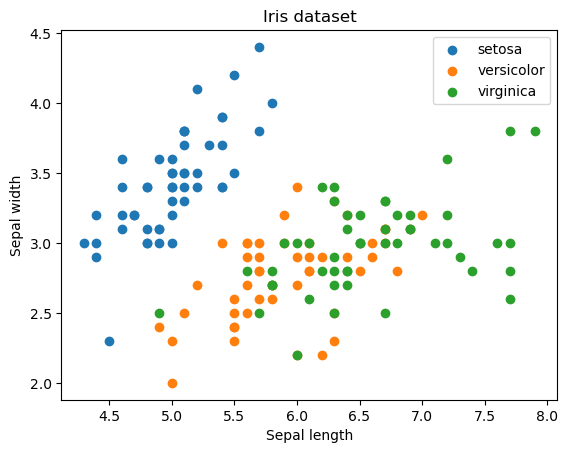

In [4]:
import matplotlib.pyplot as plt

# Plot each class with different colors
for i in range(iris.target_names.shape[0]):
    plt.scatter(iris.data[iris.target==i, 0], iris.data[iris.target==i, 1], label=iris.target_names[i])

# Set plot labels
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')
plt.title('Iris dataset')

# Show plot
plt.legend()
plt.show()

Scatter plot of datapoints with respective 2 features namely
 - Petal Length
 - Petal Width

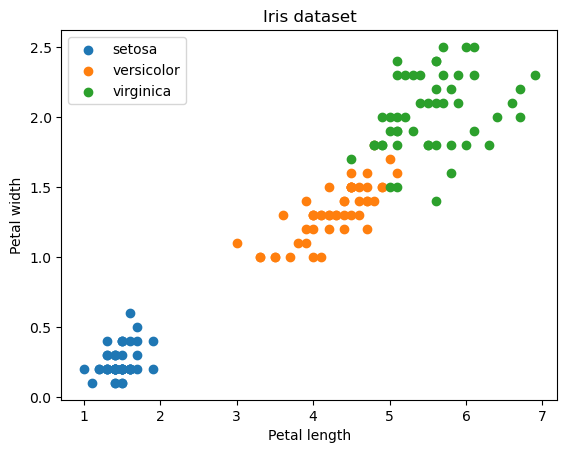

In [5]:
# Plot each class with different colors
for i in range(iris.target_names.shape[0]):
    plt.scatter(iris.data[iris.target==i, 2], iris.data[iris.target==i, 3], label=iris.target_names[i])

# Set plot labels
plt.xlabel('Petal length')
plt.ylabel('Petal width')
plt.title('Iris dataset')

# Show plot
plt.legend()
plt.show()

## Random forest
**It is an ensemble learning method that combines multiple decision trees to improve accuracy and reduce overfitting. The idea is to build multiple trees with random subsets of the data and features, and then take a majority vote to make predictions. Random forests are widely used in various fields such as finance, healthcare, and engineering due to their high accuracy and ability to handle high-dimensional data.**

This code imports the iris dataset from the scikit-learn library. 

In [6]:
from sklearn.datasets import load_iris
iris = load_iris()

This code snippet uses the train_test_split function from the sklearn.model_selection module to split the Iris dataset into training and testing sets. The dataset is split in such a way that 20% of the samples are reserved for testing, and the remaining 80% are used for training. The random_state parameter is set to 42 to ensure that the same random split is obtained each time the code is run. The resulting training and testing sets are stored in the variables X_train, X_test, y_train, and y_test. X_train and X_test contain the features (i.e., measurements) of the iris samples, and y_train and y_test contain their corresponding target labels (i.e., species).

In [7]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.2, random_state=42)

This code imports the RandomForestClassifier class from the sklearn.ensemble module, instantiates an object of the class with 100 decision trees, sets a random seed of 42, and trains the model on the training data X_train and y_train. The resulting trained model can be used for making predictions on new data.

In [8]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

y_pred is a numpy array containing the predicted class labels for the test set obtained using the trained Random Forest classifier model.

In [9]:
y_pred = model.predict(X_test)

This code calculates the accuracy score of the predicted values y_pred against the actual target values y_test using the accuracy_score function from the sklearn.metrics module. The calculated accuracy score is then printed to the console.

In [10]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 1.0


This cell contains a code snippet to visualize the trained model and interpret how the model is working
Only first 5 decision trees of the overall trees are displayed here

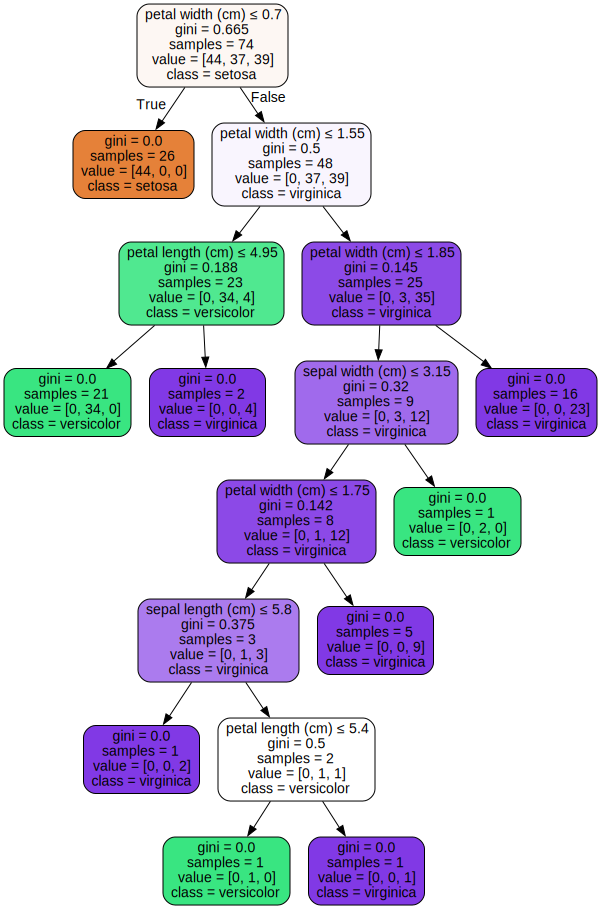

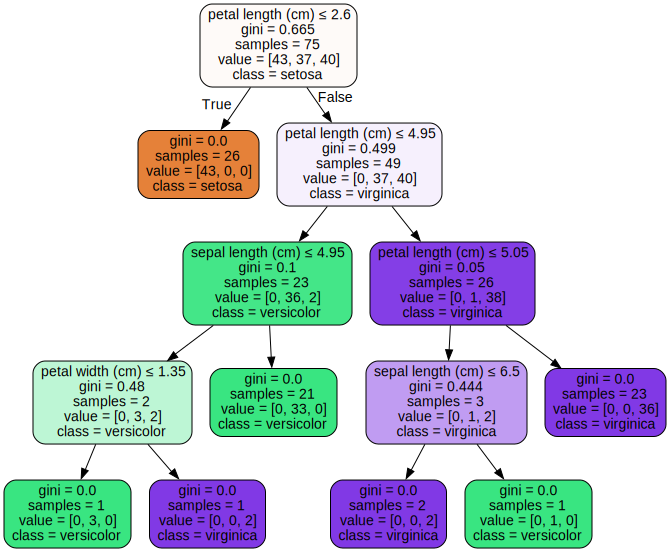

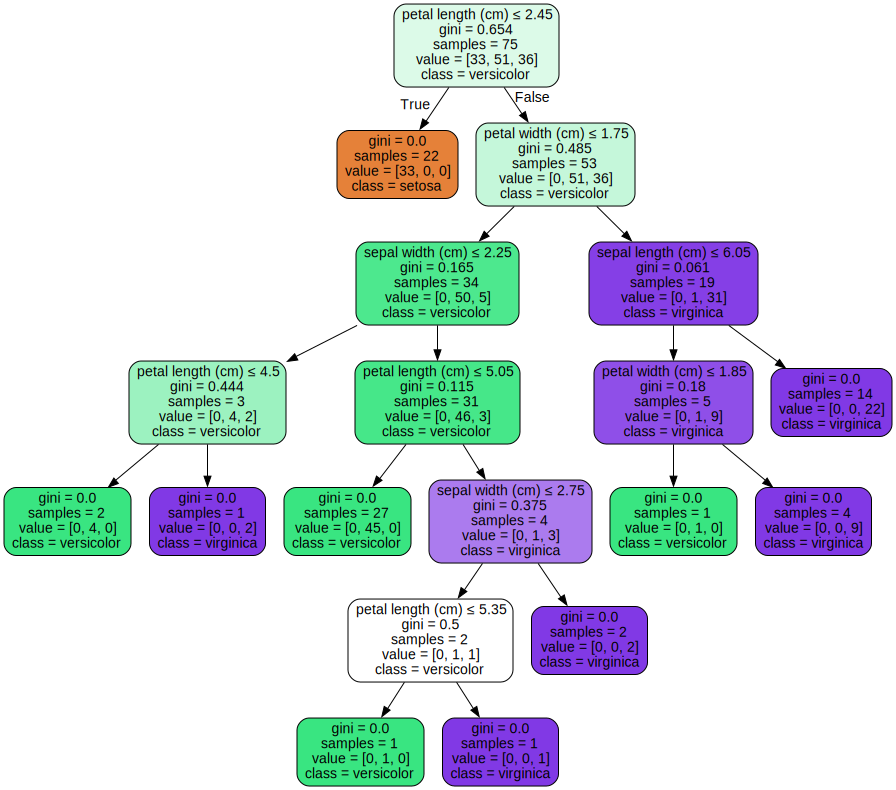

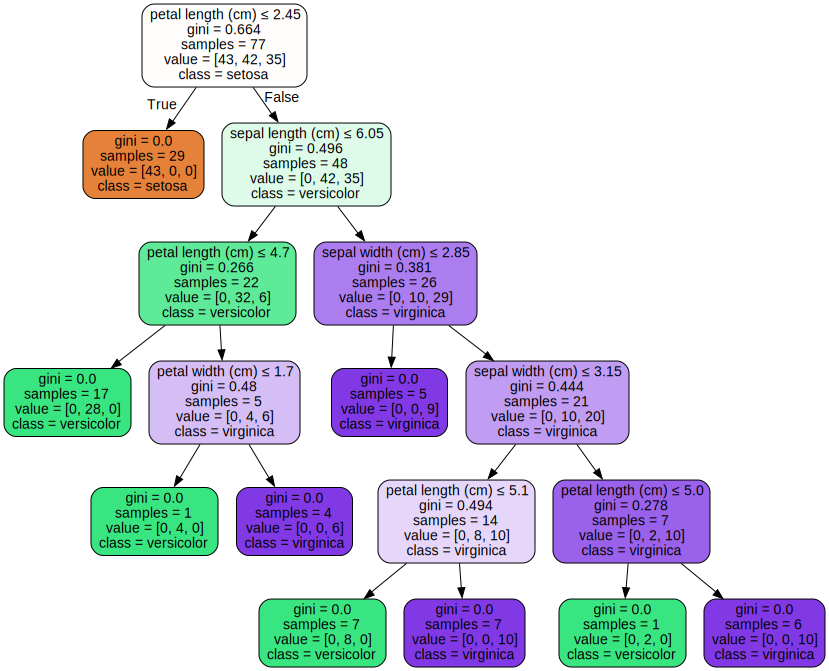

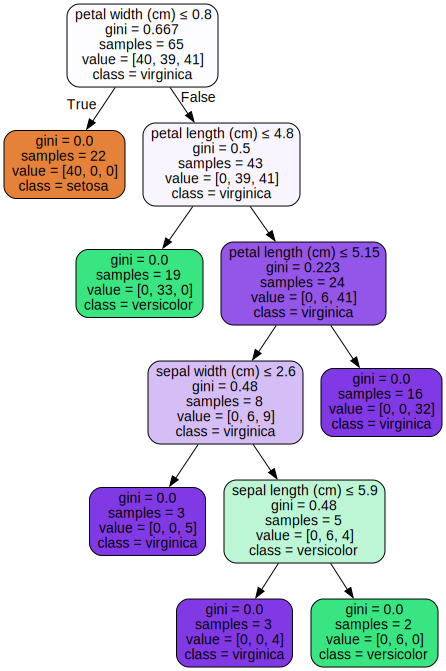

In [11]:
from sklearn.tree import export_graphviz
from IPython.display import display
from graphviz import Source
for i in range(5):
    dot_data = export_graphviz(model.estimators_[i], out_file=None, feature_names=iris.feature_names, class_names=iris.target_names, filled=True, rounded=True, special_characters=True)
    graph = Source(dot_data)
    display(graph)

In [12]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import pandas as pd


# Load the dataset
df = pd.read_csv('trainingTestingDataset.csv')

# Separate the features and target variable
y = df['label']
df.drop(['RCLS_GEOL'], axis=1)
X = df.iloc[:, 1:19]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Create a Random Forest classifier with 100 trees
rf_clf = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model on the training data
rf_clf.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = rf_clf.predict(X_test)

# Evaluate the performance of the model using accuracy score
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


Accuracy: 0.9285714285714286
